In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import IPython.display as display
from PIL import Image

2023-09-01 11:16:54.599189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-01 11:16:54.917291: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-01 11:16:54.989746: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-01 11:16:54.989768: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [2]:
import os
img_path = os.listdir("C:\Users\sweet\Downloads\200_images\data")

FileNotFoundError: [Errno 2] No such file or directory: 'image_samples'

In [ ]:
img_path[53]

'Schoolboy (Portrait of Henry Walters at Age Twelve\uf03f)_medium.jpg'

In [ ]:
# img = Image.open('sample_images/_Spring_ or _Joy__medium.jpg')
# tf.convert_to_tensor(img)

In [ ]:
img_tensors = []

In [ ]:
for image_filename in img_path:
    img = Image.open(os.path.join('image_samples', image_filename))
    img = img.resize((224,224))
    img_tensors.append(tf.convert_to_tensor(img))
    

In [ ]:
len(img_path)

201

In [ ]:
len(img_tensors)

201

In [ ]:
img_tensors

In [ ]:
plt.imshow(img_tensors[100])

In [ ]:
test_image = img_tensors[199]

In [ ]:
#224 x 224 x 3
# max colours

In [ ]:
# test_image_rs = tf.image.resize(test_image, (224,224))
# test_image_rs.shape

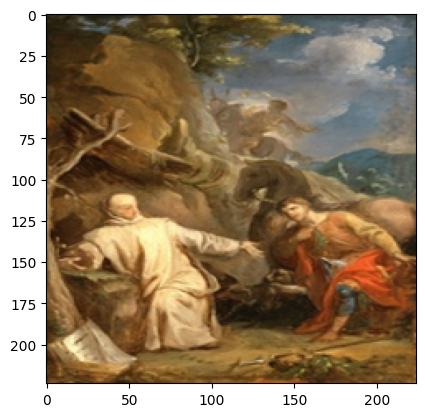

In [ ]:
plt.imshow(img_tensors[11])

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets, neighbors
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import shutil


In [ ]:
img_tensors

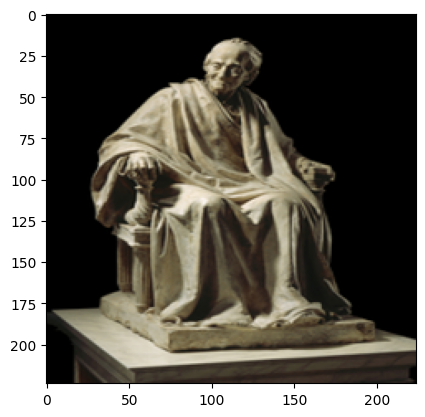

In [ ]:
plt.imshow(img_tensors[52])

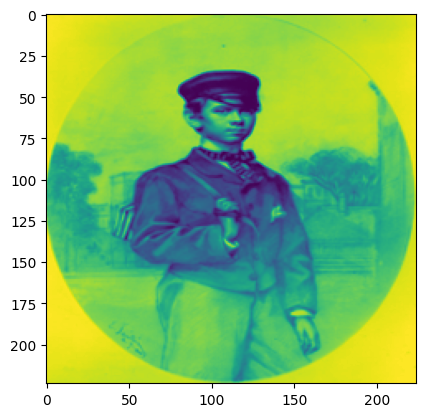

In [ ]:
plt.imshow(img_tensors[53])

In [ ]:
img_tensors[53].shape

TensorShape([224, 224])

In [ ]:

reshaped_images = []
i = 0
# Loop through each image tensor and reshape it
for img in img_tensors:
    if np.array(img).shape != (224,224,3):
        print(i, np.array(img).shape)
    i += 1
    # reshaped_images.append(np.array(img).reshape(-1, 3))

53 (224, 224)


In [ ]:
img_tensors.pop(53)

<tf.Tensor: shape=(224, 224), dtype=uint8, numpy=
array([[254, 254, 254, ..., 245, 246, 246],
       [254, 254, 254, ..., 245, 246, 246],
       [253, 254, 254, ..., 244, 245, 245],
       ...,
       [241, 240, 239, ..., 255, 255, 255],
       [240, 239, 239, ..., 255, 255, 255],
       [241, 239, 239, ..., 255, 255, 255]], dtype=uint8)>

In [ ]:
len(img_tensors)

200

In [ ]:
reshaped_images = []
i = 0
# Loop through each image tensor and reshape it
for img in img_tensors:
    reshaped_images.append(np.array(img).reshape(-1, 3))
    


In [ ]:
reshaped_images=np.array(reshaped_images)

In [ ]:
reshaped_images.shape

(200, 50176, 3)

In [ ]:
reshaped_images_reshape=reshaped_images.reshape(reshaped_images.shape[0],-1)

In [ ]:
reshaped_images_reshape.shape

(200, 150528)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

image_data_standardized = scaler.fit_transform(reshaped_images_reshape)
image_data_standardized

array([[ 1.63220387,  1.37256042,  1.02415532, ...,  1.52888586,
         1.30630037,  0.89002842],
       [ 0.66157311,  0.35645777,  0.06204778, ...,  0.41740582,
         0.17991333, -0.16180094],
       [-0.83849262, -0.82401442, -0.73699068, ..., -0.18339421,
        -0.17497574, -0.0960616 ],
       ...,
       [-0.86790568, -0.64470219, -0.39454562, ..., -1.02451424,
        -0.68416441, -0.30971444],
       [-0.92673178, -0.30102041, -0.39454562, ..., -1.05455424,
        -0.80760408, -0.47406278],
       [-0.08845976, -0.27113504, -0.28039727, ...,  0.53756582,
         0.19534329,  0.1011564 ]])

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=6)

In [ ]:
num_clusters = 10  # Number of clusters you want to create
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(image_data_standardized)

/Users/kamran1998/.pyenv/versions/3.10.6/envs/artsy-fartsy/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
clusters

array([8, 2, 0, 0, 0, 9, 2, 2, 2, 2, 0, 2, 7, 0, 6, 7, 6, 3, 7, 0, 7, 6,
       2, 0, 7, 4, 7, 8, 6, 8, 6, 7, 2, 6, 1, 2, 2, 6, 6, 1, 6, 2, 1, 6,
       0, 1, 0, 6, 0, 1, 7, 6, 4, 8, 7, 4, 6, 1, 7, 7, 4, 0, 0, 4, 8, 7,
       7, 7, 8, 0, 8, 1, 2, 8, 1, 2, 1, 0, 6, 4, 0, 0, 1, 2, 8, 2, 0, 4,
       8, 2, 6, 8, 2, 7, 7, 7, 4, 4, 7, 2, 9, 8, 4, 2, 2, 7, 6, 7, 7, 8,
       7, 1, 4, 2, 8, 6, 6, 8, 2, 2, 6, 4, 0, 6, 6, 6, 9, 0, 8, 2, 2, 5,
       0, 0, 2, 8, 2, 7, 6, 0, 2, 7, 7, 7, 6, 2, 8, 2, 9, 2, 8, 8, 2, 6,
       4, 1, 2, 7, 2, 0, 6, 0, 1, 2, 7, 7, 6, 8, 2, 8, 1, 2, 2, 2, 8, 4,
       4, 2, 2, 7, 8, 8, 0, 0, 0, 0, 1, 2, 7, 7, 0, 6, 6, 4, 8, 0, 8, 0,
       2, 7], dtype=int32)

In [ ]:
for i,x in enumerate(list(clusters)):
    if x==0:
        plt.imshow(img_tensors[i])
        plt.show()  

NameError: name 'clusters' is not defined

In [ ]:
for i,x in enumerate(list(clusters)):
    if x==1:
        plt.imshow(img_tensors[i])
        plt.show()  

NameError: name 'clusters' is not defined

In [ ]:
for i,x in enumerate(list(clusters)):
    if x==2:
        plt.imshow(img_tensors[i])
        plt.show()  

NameError: name 'clusters' is not defined

In [ ]:
for i,x in enumerate(list(clusters)):
    if x==3:
        plt.imshow(img_tensors[i])
        plt.show() 

NameError: name 'clusters' is not defined

In [ ]:
for i,x in enumerate(list(clusters)):
    if x==4:
        plt.imshow(img_tensors[i])
        plt.show() 

NameError: name 'clusters' is not defined